<a href="https://colab.research.google.com/github/bomiiisong/AI_Project/blob/master/Modeling/Resnet_All_Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/img_final_mdx.zip'

ls: cannot access '/content/drive/My Drive/Colab Notebooks/datasets/img_final_mdx.zip': No such file or directory


In [ ]:
!ls -l '/content/drive/My Drive/AI_team3/img_final_mdx.zip'

-rw------- 1 root root 311857006 Apr 20 06:29 '/content/drive/My Drive/AI_team3/img_final_mdx.zip'


In [ ]:
!unzip /content/drive/My\ Drive/AI_team3/img_final_mdx.zip

In [ ]:
!ls -l './img'

total 52
drwxr-xr-x 2 root root 24576 Apr 20  2021 0
drwxr-xr-x 2 root root 24576 Apr 20  2021 1


In [ ]:
import pathlib
from glob import glob
from keras.preprocessing import image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from keras import layers, models, optimizers
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

# All trainable

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
conv_base =  ResNet50(weights='imagenet', include_top=False, input_shape =(640,640,3))

tf.keras.initializers.HeNormal()
model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])    

94773248/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 20, 20, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 819200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               209715456 
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 233,303,425
Trainable params: 233,250,305
Non-trainable params: 53,120
_________________________________________________________________


## batch_size=10

In [ ]:
image_dir = '/content/img'

random_seed = 414

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(image_dir,target_size = (640, 640), seed=random_seed,
                                                    batch_size = 5, class_mode = 'binary', subset='training')
valid_generator = datagen.flow_from_directory(image_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=9, class_mode='binary', subset='validation')


Found 1325 images belonging to 2 classes.
Found 567 images belonging to 2 classes.


## modeling

In [ ]:
%%time

Hist = model.fit(train_generator, 
                 steps_per_epoch=train_generator.n // train_generator.batch_size,
                epochs=50, validation_data=valid_generator, 
                 validation_steps=valid_generator.n // valid_generator.batch_size) 

Epoch 1/50
265/265 [==============================] - 186s 555ms/step - loss: 1.2080 - accuracy: 0.6770 - val_loss: 2.0564 - val_accuracy: 0.4991
Epoch 2/50
265/265 [==============================] - 145s 546ms/step - loss: 0.1600 - accuracy: 0.9318 - val_loss: 2.2683 - val_accuracy: 0.5203
Epoch 3/50
265/265 [==============================] - 145s 548ms/step - loss: 0.1002 - accuracy: 0.9647 - val_loss: 0.6057 - val_accuracy: 0.7901
Epoch 4/50
265/265 [==============================] - 145s 545ms/step - loss: 0.0318 - accuracy: 0.9872 - val_loss: 0.4151 - val_accuracy: 0.8713
Epoch 5/50
265/265 [==============================] - 144s 544ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.4424 - val_accuracy: 0.8360
Epoch 6/50
265/265 [==============================] - 145s 546ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 0.4623 - val_accuracy: 0.8501
Epoch 7/50
265/265 [==============================] - 144s 544ms/step - loss: 0.0088 - accuracy: 0.9986 - val_loss: 0.4307 -

## model save

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/ResNet_all_train.h5') # 2시간 58초 소요

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 3018230
-rw------- 1 root root      34592 Mar 17 07:31 001_Model_iris.h5
-rw------- 1 root root   41499744 Mar 23 06:47 002_dogs_and_cats_Augmentation.h5
-rw------- 1 root root   41498896 Mar 23 02:16 002_dogs_and_cats_small.h5
-rw------- 1 root root   25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root  140748400 Mar 24 08:15 005_dogs_and_cats_fine_tuning.h5
-rw------- 1 root root   41661328 Mar 23 06:45 201_CNN_Logo_Augmentation.h5
-rw------- 1 root root 2800023136 Apr 20 08:37 ResNet_all_train.h5


In [ ]:
from keras.models import load_model
model_loading = load_model('/content/drive/My Drive/Colab Notebooks/models/ResNet_all_train.h5')

In [ ]:
loss, accuracy = model_loading.evaluate(valid_generator, steps=valid_generator.n // valid_generator.batch_size)

print(f'Loss : {loss:.5f}')
print(f'Accuracy : {accuracy:.5f}')

63/63 [==============================] - 64s 518ms/step - loss: 1.3314 - accuracy: 0.8677
Loss : 1.33144
Accuracy : 0.86772


## 시각화

In [ ]:
import pathlib
from glob import glob

data_root = pathlib.Path(glob('/content/*/*/')[0])
print(data_root)
# label = ['0','1']

/content/img/1


In [ ]:
import random

all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]

# random.choice(all_image_paths)

all_image_paths

In [ ]:
import cv2
import numpy as np

plt.figure(figsize=(20,10))

paths = all_image_paths[20:30]

for idx, image in enumerate(paths) :
    img = cv2.imread(image)
    img = cv2.resize(img, dsize=(640,640))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    logits = model_loading.predict(img)[0]
    
    plt.subplot(2, 5, idx+1)
    plt.imshow(plt.imread(image))
    label = image.split('/')[-2]
    plt.title("label : " + str(label))
    plt.xlabel(logits)

* worst

In [ ]:
import pathlib
from glob import glob

data_root_worst = pathlib.Path(glob('/content/*/*/')[1])
print(data_root_worst)
# label = ['0','1']

/content/img/0


In [ ]:
import random

worst_image_paths = list(data_root_worst.glob('*'))
worst_image_paths = [str(path) for path in worst_image_paths]

# random.choice(all_image_paths)

worst_image_paths

In [ ]:
import cv2
import numpy as np

plt.figure(figsize=(20,10))

paths_worst = worst_image_paths[20:30]

for idx, image in enumerate(paths_worst) :
    worst_img = cv2.imread(image)
    worst_img = cv2.resize(worst_img, dsize=(640,640))
    worst_img = worst_img / 255.0
    worst_img = np.expand_dims(worst_img, axis=0)

    logits_2 = model_loading.predict(worst_img)[0]
    
    plt.subplot(2, 5, idx+1)
    plt.imshow(plt.imread(image))
    label = image.split('/')[-2]
    plt.title("label : " + str(label))
    plt.xlabel(logits_2)

## loss & 시각화




63/63 [==============================] - 17s 268ms/step - loss: 1.3314 - accuracy: 0.8677
Loss = 1.33144
Accuracy = 0.86772


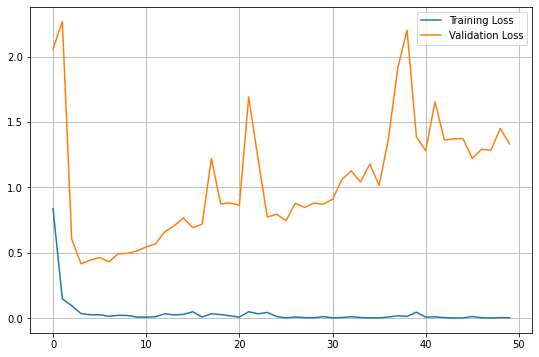

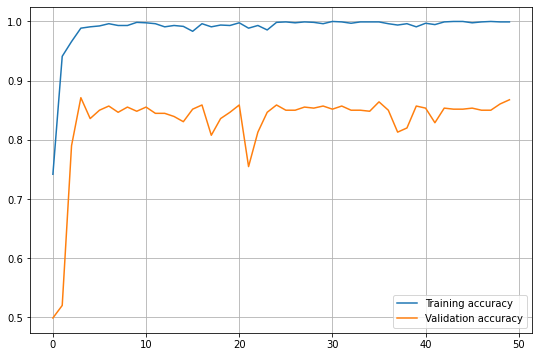

In [ ]:
loss, accuracy = model.evaluate(valid_generator, steps=valid_generator.n // valid_generator.batch_size)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))




plt.figure(figsize = (9, 6))
plt.plot( Hist.history['loss'])
plt.plot(Hist.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


plt.figure(figsize = (9, 6))
plt.plot(Hist.history['accuracy'])
plt.plot( Hist.history['val_accuracy'])

plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()